# Combine Drought Data and National Park Data

A. Stein 12.3.21

Got shapefiles here: [https://earthworks.stanford.edu/catalog/stanford-mg196xb7926](https://earthworks.stanford.edu/catalog/stanford-mg196xb7926)

In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import xarray as xr
import pandas as pd
from netCDF4 import Dataset
from tqdm.notebook import tqdm

import geopandas as gpd
import contextily as cx

cwd = '/pool0/home/steinadi/data/drought/drought_impact/data'

Populating the interactive namespace from numpy and matplotlib


In [2]:
fdsi = xr.open_dataset(f"{cwd}/fdsi.nc") # EPSG:4326
leri = xr.open_dataset(f"{cwd}/leri.nc") 
mcdi = xr.open_dataset(f"{cwd}/mcdi.nc")
vegdri = xr.open_dataset(f"{cwd}/vegdri.nc") # gcs_wgs_84

Big plot v

fig, axs = plt.subplots(2,2, figsize=(15,8))
ax = axs.ravel()

fdsi.sel(year=2020)['fdsi'].plot(ax=ax[0])
leri.sel(time='2021-10')['leri'].plot(ax=ax[1])
mcdi.isel(time=-25)['SM_fraction'].plot(ax=ax[2])
vegdri.sel(time='2020-10-11')['vegdri'].plot(ax=ax[3])

ax[0].set_title('FDSI', fontsize=15)
ax[1].set_title('LERI', fontsize=15)
ax[2].set_title('MCDI', fontsize=15)
ax[3].set_title('VEGDRI', fontsize=15)

fig.text(0.4, 1.02, 'Example Drought Measures', fontsize=20)

plt.tight_layout()

In [3]:
parks_shp = gpd.read_file(f'{cwd}/shapefiles/parks.shp')

In [4]:
# get the projection information
parks_shp.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

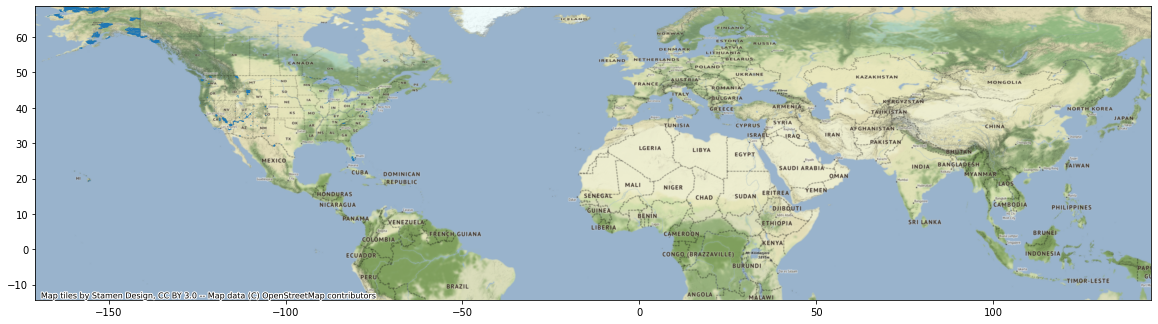

In [5]:
ax = parks_shp.plot(figsize=(20,20))
minx, miny, maxx, maxy = parks_shp.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
cx.add_basemap(ax, crs=parks_shp.crs)

In [6]:
wa_parks_shp = parks_shp.iloc[np.where(parks_shp['STATE'] == 'WA')[0]]
wa_parks_shp

,UNIT_TYPE,STATE,REGION,UNIT_CODE,UNIT_NAME,DATE_EDIT,GIS_NOTES,CREATED_BY,METADATA,PARKNAME,GNIS_ID,STPOSTAL1,STPOSTAL2,STPOSTAL3,STPOSTAL4,STFIPS1,STFIPS2,STFIPS3,STFIPS4,geometry
360,National Park,WA,PW,MORA,Mount Rainier National Park,2008-04-21,Lands - http://landsnet.nps.gov/tractsnet/docu...,Lands,http://nrdata.nps.gov/programs/Lands/MORA_meta...,Mount Rainier,None,WA,None,None,None,53,None,None,None,"MULTIPOLYGON (((-122.12951 46.75566, -122.1269..."
361,National Historic Site,WA,PW,FOVA,Fort Vancouver National Historic Site,2011-03-03,Lands - http://landsnet.nps.gov/tractsnet/docu...,Lands,http://nrdata.nps.gov/programs/Lands/FOVA_meta...,Fort Vancouver,None,WA,OR,None,None,53,41,None,None,"MULTIPOLYGON (((-122.66870 45.62037, -122.6680..."
396,National Historic Site,WA,PW,WHMI,Whitman Mission National Historic Site,2011-10-27,Lands - http://landsnet.nps.gov/tractsnet/docu...,Lands,http://nrdata.nps.gov/programs/Lands/WHMI_meta...,Whitman Mission,None,WA,None,None,None,53,None,None,None,"POLYGON ((-118.46523 46.04075, -118.47090 46.0..."
431,National Historic Site,WA,PW,MIIN,Minidoka National Historic Site,2012-09-28,Lands - http://landsnet.nps.gov/tractsnet/docu...,Lands,http://nrdata.nps.gov/programs/Lands/MIIN_meta...,Minidoka,None,ID,WA,None,None,16,53,None,None,"MULTIPOLYGON (((-114.25560 42.67716, -114.2555..."


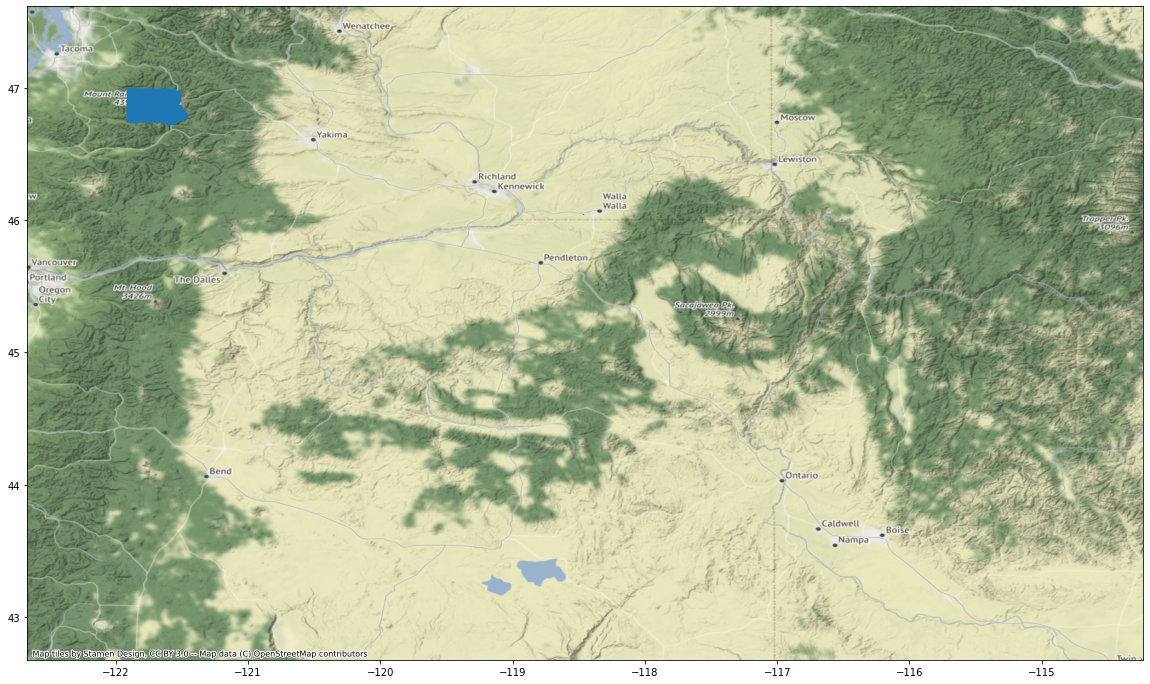

In [7]:
ax = wa_parks_shp.plot(figsize=(20,20))
minx, miny, maxx, maxy = wa_parks_shp.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
cx.add_basemap(ax, crs=wa_parks_shp.crs)

In [8]:
mt_rainer = wa_parks_shp.iloc[0]
mt_rainer

/pool0/data/steinadi/.conda/envs/sedi/lib/python3.7/site-packages/pandas/core/dtypes/inference.py:383: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  iter(obj)  # Can iterate over it.
/pool0/data/steinadi/.conda/envs/sedi/lib/python3.7/site-packages/pandas/core/dtypes/inference.py:384: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  len(obj)  # Has a length associated with it.
/pool0/data/steinadi/.conda/envs/sedi/lib/python3.7/site-packages/pandas/io/formats/printing.py:118: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  

UNIT_TYPE                                         National Park
STATE                                                        WA
REGION                                                       PW
UNIT_CODE                                                  MORA
UNIT_NAME                           Mount Rainier National Park
DATE_EDIT                                            2008-04-21
GIS_NOTES     Lands - http://landsnet.nps.gov/tractsnet/docu...
CREATED_BY                                                Lands
METADATA      http://nrdata.nps.gov/programs/Lands/MORA_meta...
PARKNAME                                          Mount Rainier
GNIS_ID                                                    None
STPOSTAL1                                                    WA
STPOSTAL2                                                  None
STPOSTAL3                                                  None
STPOSTAL4                                                  None
STFIPS1                                 

In [9]:
fdsi

<xarray.Dataset>
Dimensions:  (lat: 585, lon: 1386, time: 41, year: 41)
Coordinates:
  * lat      (lat) float64 49.4 49.36 49.32 49.28 ... 25.19 25.15 25.11 25.07
  * lon      (lon) float64 -124.8 -124.7 -124.7 -124.6 ... -67.14 -67.1 -67.06
  * time     (time) object 1980-01-14 00:00:00 ... 2020-01-14 00:00:00
  * year     (year) int32 1980 1981 1982 1983 1984 ... 2016 2017 2018 2019 2020
Data variables:
    fdsi     (year, lat, lon) float32 ...
Attributes: (12/22)
    geospatial_bounds_crs:           EPSG:4326
    Conventions:                     CF-1.6
    geospatial_bounds:               POLYGON((-124.7666666333333 49.400000000...
    geospatial_lat_min:              25.066666666666666
    geospatial_lat_max:              49.40000000000000
    geospatial_lon_min:              -124.7666666333333
    ...                              ...
    note3:                           Data in slices after last_permanent_slic...
    note4:                           Data in slices after last_provisional_sl...
    note5:                           Days correspond approximately to calenda...
    history:                         Fri Mar 12 19:16:03 2021: ncks --mk_rec_...
    NCO:                             4.7.2
    DODS_EXTRA.Unlimited_Dimension:  time

The below cell checks that all lat-lon combos work

for lat in tqdm(fdsi['lat'], total=585):
    for lon in fdsi['lon']:
        try:
            fdsi.sel(lat=lat, lon=lon)
        except:
            print(f"Error: {lat} {lon} does not exist")

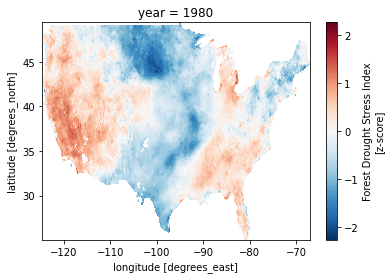

In [10]:
fdsi['fdsi'].isel(year=0).plot()

In [11]:
import rioxarray

In [12]:
try:
    os.remove(f'{cwd}/fdsi_raster.tif')
except:
    pass
fdsi['fdsi'].rio.to_raster(f'{cwd}/fdsi_raster.tif')

In [13]:
fdsi_raster = rioxarray.open_rasterio(f'{cwd}/fdsi_raster.tif', masked=True)
fdsi_raster

<xarray.DataArray (band: 41, y: 585, x: 1386)>
[33243210 values with dtype=float32]
Coordinates:
  * band         (band) int64 1 2 3 4 5 6 7 8 9 ... 33 34 35 36 37 38 39 40 41
  * x            (x) float64 -124.8 -124.7 -124.7 -124.6 ... -67.14 -67.1 -67.06
  * y            (y) float64 49.4 49.36 49.32 49.28 ... 25.19 25.15 25.11 25.07
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    long_name:     Forest Drought Stress Index

In [14]:
wa_parks_shp

,UNIT_TYPE,STATE,REGION,UNIT_CODE,UNIT_NAME,DATE_EDIT,GIS_NOTES,CREATED_BY,METADATA,PARKNAME,GNIS_ID,STPOSTAL1,STPOSTAL2,STPOSTAL3,STPOSTAL4,STFIPS1,STFIPS2,STFIPS3,STFIPS4,geometry
360,National Park,WA,PW,MORA,Mount Rainier National Park,2008-04-21,Lands - http://landsnet.nps.gov/tractsnet/docu...,Lands,http://nrdata.nps.gov/programs/Lands/MORA_meta...,Mount Rainier,None,WA,None,None,None,53,None,None,None,"MULTIPOLYGON (((-122.12951 46.75566, -122.1269..."
361,National Historic Site,WA,PW,FOVA,Fort Vancouver National Historic Site,2011-03-03,Lands - http://landsnet.nps.gov/tractsnet/docu...,Lands,http://nrdata.nps.gov/programs/Lands/FOVA_meta...,Fort Vancouver,None,WA,OR,None,None,53,41,None,None,"MULTIPOLYGON (((-122.66870 45.62037, -122.6680..."
396,National Historic Site,WA,PW,WHMI,Whitman Mission National Historic Site,2011-10-27,Lands - http://landsnet.nps.gov/tractsnet/docu...,Lands,http://nrdata.nps.gov/programs/Lands/WHMI_meta...,Whitman Mission,None,WA,None,None,None,53,None,None,None,"POLYGON ((-118.46523 46.04075, -118.47090 46.0..."
431,National Historic Site,WA,PW,MIIN,Minidoka National Historic Site,2012-09-28,Lands - http://landsnet.nps.gov/tractsnet/docu...,Lands,http://nrdata.nps.gov/programs/Lands/MIIN_meta...,Minidoka,None,ID,WA,None,None,16,53,None,None,"MULTIPOLYGON (((-114.25560 42.67716, -114.2555..."


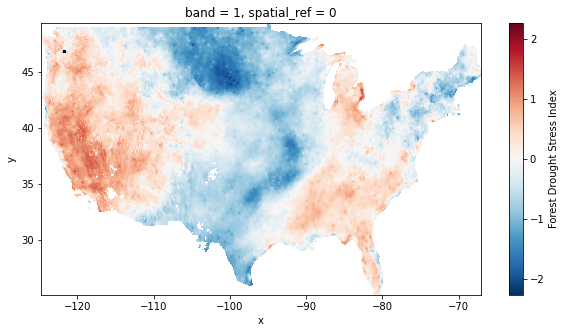

In [15]:
fig, ax = plt.subplots(figsize=(10,5))

fdsi_raster.sel(band=1).plot.imshow(ax=ax)
wa_parks_shp.loc[[360], 'geometry'].plot(ax=ax, color='black')
plt.show()

In [16]:
parks_shp.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [17]:
fdsi_raster.rio.write_crs(parks_shp.crs, inplace=True)

<xarray.DataArray (band: 41, y: 585, x: 1386)>
[33243210 values with dtype=float32]
Coordinates:
  * band         (band) int64 1 2 3 4 5 6 7 8 9 ... 33 34 35 36 37 38 39 40 41
  * x            (x) float64 -124.8 -124.7 -124.7 -124.6 ... -67.14 -67.1 -67.06
  * y            (y) float64 49.4 49.36 49.32 49.28 ... 25.19 25.15 25.11 25.07
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    long_name:     Forest Drought Stress Index

In [18]:
mt_rainer_fdsi = fdsi_raster.rio.clip(mt_rainer.geometry, parks_shp.crs)

/pool0/data/steinadi/.conda/envs/sedi/lib/python3.7/site-packages/rasterio/features.py:284: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for index, item in enumerate(shapes):


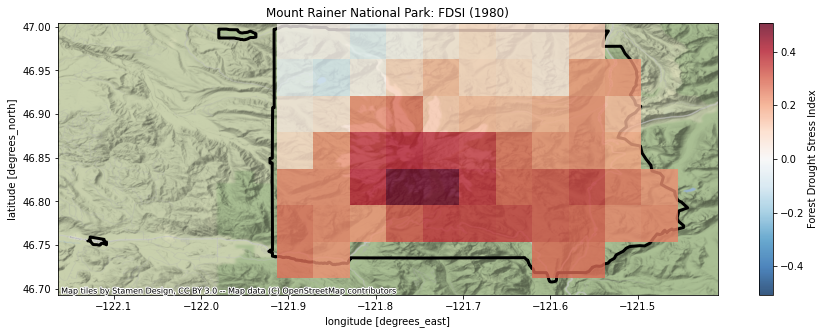

In [19]:
fig, ax = plt.subplots(figsize=(15,5))

i = 0
mt_rainer_fdsi.sel(band=i+1).plot.imshow(ax=ax, zorder=1, alpha=0.8)
wa_parks_shp.loc[[360], 'geometry'].plot(ax=ax, facecolor='none', ec='k', linewidth=3, zorder=0)
minx, maxx = ax.get_xlim()
miny, maxy = ax.get_ylim()
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
cx.add_basemap(ax, crs=wa_parks_shp.crs, zorder=-1)

ax.set_title(f"Mount Rainer National Park: FDSI ({fdsi['year'].values[i]})")
plt.show()

Hey! We did it, we clipped it to the national park! Now only several thousand to go

In [20]:
mt_rainer_fdsi_means = [float(mt_rainer_fdsi.sel(band=i).mean().values) for i in np.arange(1,42)]

And now we got means too! Not certain if this is the best statistic but we gotta start somewhere

Text(0.5, 1.0, 'Mount Rainier National Park')

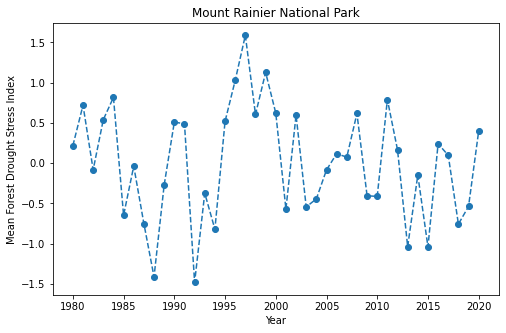

In [21]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(fdsi['year'].values, mt_rainer_fdsi_means, marker='o', linestyle='--')
ax.set_xlabel('Year')
ax.set_ylabel('Mean Forest Drought Stress Index')
ax.set_title('Mount Rainier National Park')

Let's get that visitation data

In [22]:
nat_park_vis = xr.open_dataset(f'{cwd}/national_parks_v2.nc')

In [23]:
mt_rainer_vis = nat_park_vis.sel(park='Mount Rainer National Park')

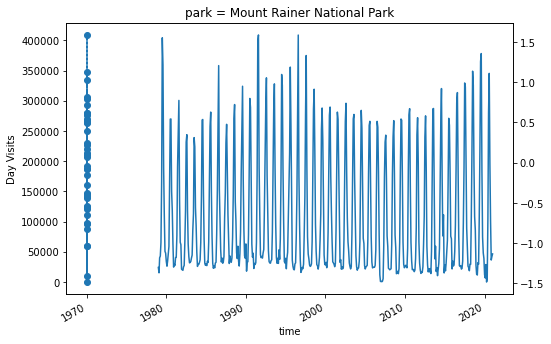

In [24]:
fig, ax = plt.subplots(figsize=(8,5))

mt_rainer_vis['Day Visits'].plot(ax=ax, label='Day Visits')

fdsi_ax = ax.twinx()
# need to fix horizontal axis for fdsi
fdsi_ax.plot(pd.to_datetime(fdsi['year'].values), mt_rainer_fdsi_means, marker='o', linestyle='--', label='FDSI')


Text(0.5, 1.0, 'Mount Rainier National Park')

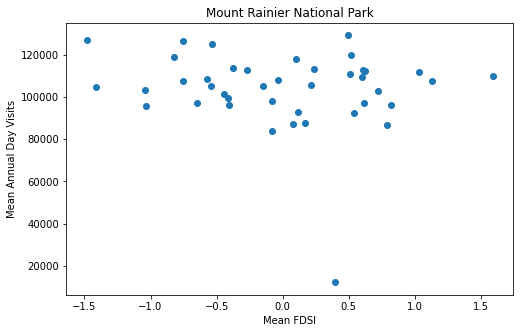

In [25]:
fig, ax = plt.subplots(figsize=(8,5))

x = mt_rainer_fdsi_means
y = mt_rainer_vis.sel(time=slice(*pd.date_range('1980', '2020')[[0,-1]]))['Day Visits'].resample(time='Y').mean()

ax.plot(x, y, marker='o', linestyle='')
ax.set_xlabel('Mean FDSI')
ax.set_ylabel('Mean Annual Day Visits')
ax.set_title('Mount Rainier National Park')



### Format workflow into function & test

In [42]:
def clip_da_by_geometry(data:xr.DataArray, geometry:pd.Series, crs, path='raster.tif', time=None):
    """Clip DataArray by GeoDataFrame.

    Using a DataArray with lat/lon coordinates, this function 
    creates a raster tif file that can then be manipulated and
    clipped to the area described by the GeoDataFrame.

    Parameters
    ----------
    data: xr.DataArray
        Contains a single variable defined by at least lat-lon
        coordinates. If also defined by time, provide another
        xr.DataArray in `time` to correctly set the variable
        later.
    geometery: polygon shape
        Contains the area to clip out
    crs
        The crs to use, should match geometery given.
    path: str (optional)
        Where to save the raster file created in the process.
        If none given, saves in current directory as
        'raster.tif'. Make certain to specify as a `.tif`
    time: xr.DataArray (optional)
        Describes the time coordinate of 

    Returns
    -------
    xr.DataArray
        Clipped data to geometry. In creating a raster, 
    
    """
    try:
        os.remove(path)
    except:
        pass
    data.rio.to_raster(path)
    raster = rioxarray.open_rasterio(path, masked=True)

    raster.rio.write_crs(crs, inplace=True)
    clipped_raster = raster.rio.clip(geometry, crs)

    # fix naming
    clipped_raster = clipped_raster.rename({'y':'lat', 'x':'lon'})
    if isinstance(time, xr.DataArray):
        clipped_raster['band'] = time.values
        clipped_raster = clipped_raster.rename({'band':time.name})
        
    return clipped_raster

In [45]:
test = clip_da_by_geometry(data=fdsi['fdsi'], geometry=mt_rainer.geometry, crs=parks_shp.crs, time=fdsi['year'])
test

/pool0/data/steinadi/.conda/envs/sedi/lib/python3.7/site-packages/rasterio/features.py:284: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for index, item in enumerate(shapes):


<xarray.DataArray (year: 41, lat: 7, lon: 11)>
array([[[ 0.01761043,  0.02073471, -0.05363262, ...,  0.11981285,
                 nan,         nan],
        [-0.02854845, -0.08004647,  0.02957515, ...,  0.22124359,
          0.22597623,         nan],
        [ 0.04936261,  0.07330178,  0.2477384 , ...,  0.24542634,
          0.16273636,         nan],
        ...,
        [ 0.24873412,  0.252255  ,  0.39952564, ...,  0.3530761 ,
          0.27332944,  0.2336615 ],
        [ 0.2837384 ,  0.25709113,  0.22860922, ...,  0.3116048 ,
          0.24857636,  0.2564259 ],
        [ 0.2806989 ,  0.23365161,         nan, ...,  0.2881132 ,
                 nan,         nan]],

       [[ 0.7103378 ,  0.71374136,  0.6663287 , ...,  0.65968394,
                 nan,         nan],
        [ 0.7287914 ,  0.73781806,  0.70755833, ...,  0.6731731 ,
          0.6286318 ,         nan],
        [ 0.8309465 ,  0.7351199 ,  0.6729828 , ...,  0.66536516,
          0.566539  ,         nan],
...
        [-0.58821505, -0.44883245, -0.36139178, ..., -0.5486073 ,
         -0.5118897 , -0.5538596 ],
        [-0.5932898 , -0.56044143, -0.5547757 , ..., -0.7303139 ,
         -0.5874354 , -0.53484815],
        [-0.600738  , -0.5586307 ,         nan, ..., -0.77993333,
                 nan,         nan]],

       [[ 0.45485532,  0.5397338 ,  0.46232024, ...,  0.22600864,
                 nan,         nan],
        [ 0.49341762,  0.3524475 ,  0.5093177 , ...,  0.10698049,
          0.171242  ,         nan],
        [ 0.42510357,  0.56995434,  0.6224215 , ...,  0.14908826,
          0.00376211,         nan],
        ...,
        [ 0.5446049 ,  0.54647076,  0.5646784 , ...,  0.24853565,
          0.27742338,  0.29445872],
        [ 0.5805569 ,  0.5375211 ,  0.54730785, ..., -0.02014201,
          0.22491625,  0.31851512],
        [ 0.5267185 ,  0.58608705,         nan, ..., -0.02836514,
                 nan,         nan]]], dtype=float32)
Coordinates:
  * lat          (lat) float64 46.98 46.94 46.9 46.86 46.82 46.78 46.73
  * lon          (lon) float64 -121.9 -121.8 -121.8 ... -121.6 -121.5 -121.5
  * year         (year) int32 1980 1981 1982 1983 1984 ... 2017 2018 2019 2020
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    long_name:     Forest Drought Stress Index

Commenting out test since it worked & managed to fix naming for band to be year instead, which will give a keyword error now.

test.isel(band=0) != mt_rainer_fdsi.isel(band=0)

test.isel(band=0) - mt_rainer_fdsi.isel(band=0)

mt_rainer_fdsi.isel(band=0)

test.isel(band=0) 

x, y = np.where(test.isel(band=0).values != mt_rainer_fdsi.isel(band=0).values)

np.where(np.isnan(test.isel(band=0).values[x,y]) != np.isnan(mt_rainer_fdsi.isel(band=0).values[x,y]))

Ah cool, so everything matches where there are not nans and where there are nans by doing direct equivalency and then checking `np.isnan`

for i in range(41):
    # need to pull out where values did not match
    x, y = np.where(test.isel(band=i).values != mt_rainer_fdsi.isel(band=i).values)
    if len(x) != 0:
        # check if those are nans
        z = np.where(np.isnan(test.isel(band=i).values[x,y]) != np.isnan(mt_rainer_fdsi.isel(band=i).values[x,y]))[0]
        if len(z) != 0:
            print(f'Error in band: {i}')
print('Done')

Woot, function works